# 원하는 링크 가져오기

In [2]:
import requests

url = "https://search.shopping.naver.com/book/catalog/39588409631"
response = requests.get(url)
html_content = response.text

# HTML 구문 분석 및 목차 추출 
* BeautifulSoup를 사용하여 HTML 콘텐츠를 구문 분석하고 목차를 추출.
* HTML 구조를 검사하여 목차를 포함하는 적절한 HTML 태그 및 속성을 식별

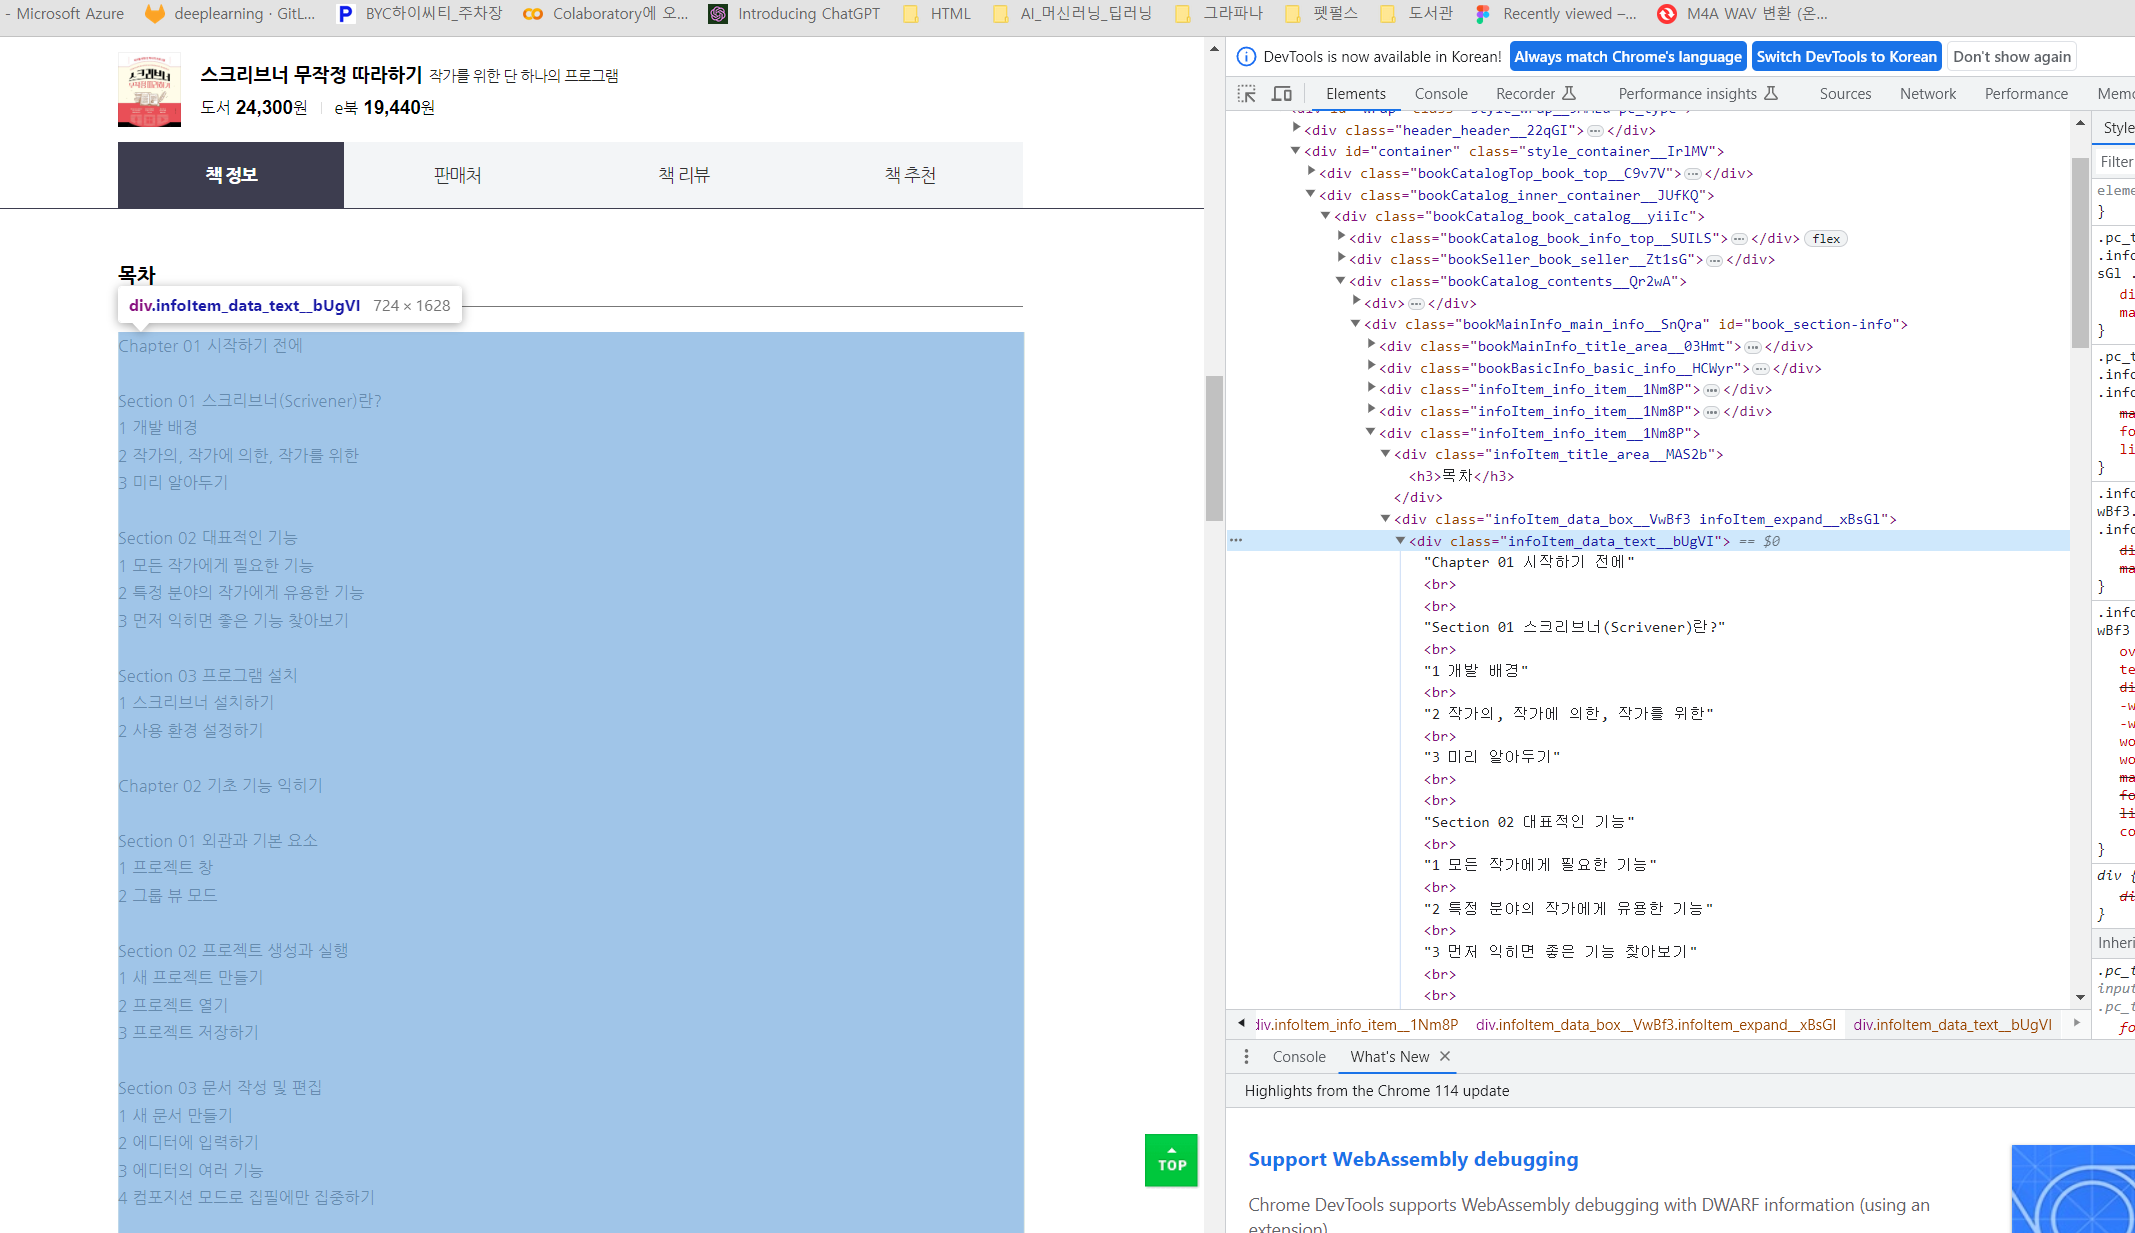

In [10]:
### 가져오고 싶은 목차
from IPython.display import Image
Image("./20230608_144732.png")

# soup.find_all('div', class = '<class이름>') 
* div/class값만 가지고 불러왔을 때 내가 원하는 값 모두 추출되지 않았다

In [19]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, "html.parser")

# Find the relevant HTML elements containing the table of contents
text_elements  = soup.find_all("div", class_ = "infoItem_data_text__bUgVI")
# table_of_contents = [item.strip() for item in table_of_contents if item.strip()]

text_list = [element.get_text() for element in text_elements]
print(table_of_contents)



['작가의, 작가에 의한, 작가를 위한 프로그램', '가장 강력한 글쓰기 도구, 스크리브너!', '▶ 국내 최초 스크리브너 가이드북 출간', '‘글먹’하는 사람들이 기다려 온 첫 번째 스크리브너 가이드북! 국내 사용환경에 맞는 윈도우 버전으로 소개합니다. 입문자도 따라할 수 있는 쉽고 자세한 설명으로 스크리브너 기능을 마스터해 보세요.', '▶ 글쓰기 작업 단계에 따라 익히는 핵심 기능', '아이디어 자료 수집부터 개요를 짜고 퇴고하는 과정까지 실제 작가들의 작업 흐름에 맞추어 목차를 구성했습니다. 작업 과정별로 내게 필요한 기능만 골라 익힐 수 있습니다.', '▶ 저자 영상 강의 및 웹소설 집필용 템플릿 제공', '50개가 넘는 저자 영상 강의가 무료로 제공되어 헷갈리는 부분을 바로바로 해결할 수 있습니다. 단축키 모음, 심화 학습 등 독학에 필요한 자료는 물론, 웹소설 집필용 템플릿까지 제공되어 실제 작업에도 활용할 수 있습니다.']


# soup.select('.<class이름>')
* 해당 클래스가 있는 모든 값들이 추출되었다. 

In [23]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, "html.parser")
soup.select(".infoItem_data_text__bUgVI")

[<div class="infoItem_data_text__bUgVI">작가의, 작가에 의한, 작가를 위한 프로그램<br/>가장 강력한 글쓰기 도구, 스크리브너!<br/><br/>▶ 국내 최초 스크리브너 가이드북 출간<br/>‘글먹’하는 사람들이 기다려 온 첫 번째 스크리브너 가이드북! 국내 사용환경에 맞는 윈도우 버전으로 소개합니다. 입문자도 따라할 수 있는 쉽고 자세한 설명으로 스크리브너 기능을 마스터해 보세요.<br/> <br/>▶ 글쓰기 작업 단계에 따라 익히는 핵심 기능<br/>아이디어 자료 수집부터 개요를 짜고 퇴고하는 과정까지 실제 작가들의 작업 흐름에 맞추어 목차를 구성했습니다. 작업 과정별로 내게 필요한 기능만 골라 익힐 수 있습니다.<br/> <br/>▶ 저자 영상 강의 및 웹소설 집필용 템플릿 제공<br/>50개가 넘는 저자 영상 강의가 무료로 제공되어 헷갈리는 부분을 바로바로 해결할 수 있습니다. 단축키 모음, 심화 학습 등 독학에 필요한 자료는 물론, 웹소설 집필용 템플릿까지 제공되어 실제 작업에도 활용할 수 있습니다.</div>,
 <div class="infoItem_data_text__bUgVI">작가를 위한 단 하나의 프로그램<br/>가장 강력한 글쓰기 도구, 스크리브너!<br/> <br/>▶ 국내 최초 스크리브너 가이드북, 그것도 윈도우 버전!<br/>집필에 최적화된 프로그램인 스크리브너, 사용해 본 유저들은 너도 나도 입을 모아 그 유용함을 칭찬하는데, 어려울 것 같아서 망설였다면? 이 책은 누구나 스크리브너의 기능을 쉽게 익힐 수 있도록 친절하게 구성되었습니다. 입문자라도 30일의 무료 체험 기간 동안 스크리브너 기능을 마스터할 수 있어요.<br/> <br/>▶ 실제 글쓰기 작업 흐름을 따라가며 기능을 익히세요!<br/>아이디어 자료 수집부터 개요를 짜고, 퇴고하는 과정까지 실제 작가들의 작업 흐름에 맞추어 목차를 구성했습니다. 작업 과정별로 내게 꼭 필요한 기능만 골라 익힐 수 있겠죠? 책 한 권을 마치고 나면 손끝이 기억

# 전처리 작업
* 위에 모든 텍스트 값이 담긴 리스트 중 가장 마지막 콘텐츠만 원했다. -> 그것이 목차
* 변수 a를 지정한 뒤, 총 개수를 확인했더니 3개라고 했다.
* 그래서 가장 마지막 값인 a[2] 원소를 새로운 list로 추출했다.
* [br]이 중복되는 경우가 있어서 공백인 원소들을 제거해야 했다. 
* 그래서 공백이 없는 원소들만 pre_text라는 리스트에 다시 담았다

In [44]:
a = soup.select(".infoItem_data_text__bUgVI")
print(len(a[2])) # len(a) = 3
text_elements = a[2].get_text(separator="<br>").split("<br>")
pre_text = []
for i in range(len(text_elements)):
    if text_elements[i] != ' ':
        pre_text.append(text_elements[i])
print(pre_text)

147
['Chapter 01 시작하기 전에', 'Section 01 스크리브너(Scrivener)란?', '1 개발 배경', '2 작가의, 작가에 의한, 작가를 위한', '3 미리 알아두기', 'Section 02 대표적인 기능', '1 모든 작가에게 필요한 기능', '2 특정 분야의 작가에게 유용한 기능', '3 먼저 익히면 좋은 기능 찾아보기', 'Section 03 프로그램 설치', '1 스크리브너 설치하기', '2 사용 환경 설정하기 ', 'Chapter 02 기초 기능 익히기', 'Section 01 외관과 기본 요소', '1 프로젝트 창', '2 그룹 뷰 모드', 'Section 02 프로젝트 생성과 실행', '1 새 프로젝트 만들기', '2 프로젝트 열기', '3 프로젝트 저장하기', 'Section 03 문서 작성 및 편집', '1 새 문서 만들기', '2 에디터에 입력하기', '3 에디터의 여러 기능', '4 컴포지션 모드로 집필에만 집중하기', 'Section 04 글의 조직과 구성', '1 바인더 구성하기', '2 컬렉션 구성하기', 'Section 05 글의 보관과 발행', '1 원고 내보내기', '2 목차 내보내기', 'Chapter 03 집필의 시작 - 아이디어 정리하기', 'Section 01 자료 수집', '1 텍스트 자료 - 기존 원고 가져오기', '2 텍스트 자료 - 웹 & PDF 가져오기', '3 미디어 및 기타 자료 가져오기', 'Section 02 개요 작성', '1 시놉시스 작성하기', '2 코르크보드로 정리하기', '3 스크래치패드 활용하기', 'Chapter 04 집필의 전개 - 체계화하기', 'Section 01 숲과 나무', '1 글의 윤곽 살펴보기', '2 글의 세부 분류하기', 'Section 02 가지다듬기', '1 찾기와 바꾸기', '2 문서 재단하기', '3 프로젝트 재단하기', 'Chapter 05 집필의 마감 - 다듬어서 출판하기', 'Section 01 퇴고', '1 인스펙터 활용하기', '2 보면

# csv파일로 저장하기
* uft-8 로 저장할 경우 한글이 깨져, uft-8-sig로 저장

In [46]:
import csv

csv_file = "table_of_contents.csv" # Replace with the path to your CSV file

# Write the table of contents to the CSV file
with open(csv_file, "w", newline="", encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    writer.writerow(["Index"])  # Optional header row
    writer.writerows(zip(pre_text))

# csv파일로 불러오기 

In [49]:
csv_file = "table_of_contents.csv" # Replace with the path to your CSV file

text_list = []
# Write the table of contents to the CSV file
with open(csv_file, "r", newline="", encoding="utf-8-sig") as file:
    reader = csv.reader(file)
    for row in reader:
        text_list.append(row[0])
        
# Print or process the loaded text content
for text in text_list:
    print(text)
    

Index
Chapter 01 시작하기 전에
Section 01 스크리브너(Scrivener)란?
1 개발 배경
2 작가의, 작가에 의한, 작가를 위한
3 미리 알아두기
Section 02 대표적인 기능
1 모든 작가에게 필요한 기능
2 특정 분야의 작가에게 유용한 기능
3 먼저 익히면 좋은 기능 찾아보기
Section 03 프로그램 설치
1 스크리브너 설치하기
2 사용 환경 설정하기 
Chapter 02 기초 기능 익히기
Section 01 외관과 기본 요소
1 프로젝트 창
2 그룹 뷰 모드
Section 02 프로젝트 생성과 실행
1 새 프로젝트 만들기
2 프로젝트 열기
3 프로젝트 저장하기
Section 03 문서 작성 및 편집
1 새 문서 만들기
2 에디터에 입력하기
3 에디터의 여러 기능
4 컴포지션 모드로 집필에만 집중하기
Section 04 글의 조직과 구성
1 바인더 구성하기
2 컬렉션 구성하기
Section 05 글의 보관과 발행
1 원고 내보내기
2 목차 내보내기
Chapter 03 집필의 시작 - 아이디어 정리하기
Section 01 자료 수집
1 텍스트 자료 - 기존 원고 가져오기
2 텍스트 자료 - 웹 & PDF 가져오기
3 미디어 및 기타 자료 가져오기
Section 02 개요 작성
1 시놉시스 작성하기
2 코르크보드로 정리하기
3 스크래치패드 활용하기
Chapter 04 집필의 전개 - 체계화하기
Section 01 숲과 나무
1 글의 윤곽 살펴보기
2 글의 세부 분류하기
Section 02 가지다듬기
1 찾기와 바꾸기
2 문서 재단하기
3 프로젝트 재단하기
Chapter 05 집필의 마감 - 다듬어서 출판하기
Section 01 퇴고
1 인스펙터 활용하기
2 보면서 수정하기
Section 02 출판
1 목표 추적하기
2 컴파일하기


# 참고사항
https://hleecaster.com/python-web-crawling-with-beautifulsoup/

In [ ]:
# 원하는 HTML 문서 요청하기
import requests
webpage = requests.get("https://www.daangn.com/hot_articles")
print(webpage.text)

# BeautifulSoup 시작하기 
import requests
from bs4 import BeautifulSoup
webpage = requests.get("https://www.daangn.com/hot_articles")
soup = BeautifulSoup(webpage.content, "html.parser")
print(soup)

# 태그(Tag) 탐색하기
# p
print(soup.p)
print(soup.p.string) # 태그 속성들은 빼고 텍스트만 가져오고 싶을 때

# h1
print(soup.h1)

#ul
for child in soup.ul.children:
    print(child) # 트리구조일 때, 하위항목 가져오기

for parent in soup.ul.parents:
    print(parent) # 트리구조일 때, 상위항목 가져오기
    
#div
for d in soup.div.children:
    print(d)

# find_all() : h2태그를 모두 찾고 싶을 때
print(soup.find_all("h2")) # 결과값을 리스트로 돌려준다

# 정규식 활용하기 
import re
soup.find_all(re.compile("[ou]l")) # <ol>, <ul> 모두 크롤링
import re
soup.find_all(re.compile("h[1-9]")) # h1~h9 모두 크롤링

# html 속성 활용
soup.find_all(attrs={'class':'card-title'})
soup.find_all(attrs={'class':'footer-list', 'id':'footer-address-list'})

# 함수 활용
def search_function(tag):
    return tag.attr('class') == "card-title" and tag.string == "Hello World"
soup.find_all(search_function)

# html 태그 중심일 경우 어려울 수 있음 
# CSS 선택자를 활용 -> select()
soup.select(".card-region-name") # 해당 클래스 모두 긁어옴 ".<클래스이름>"
soup.select("#hot-articles-go-download") # 해당 id 모두 긁어옴 "#<id>"

# 텍스트만 읽어오기 ; 앞에 10개만 출력
for x in range(0,10):
    print(soup.select(".card-title")[x].get_text())
